In [72]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import nltk 
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
emotion_df = pd.read_csv("C:/Users/moham/Artificial inteligence Project/Emotion_violance_and_hates_data/Emotion_speech.csv")


In [3]:
emotion_df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [4]:
violance_df = pd.read_csv("C:/Users/moham/Artificial inteligence Project/Emotion_violance_and_hates_data/Violance_Speech.csv")

In [5]:
violance_df.head()

,Tweet_ID,tweet,type
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence


In [6]:
hate_df = pd.read_csv("C:/Users/moham/Artificial inteligence Project/Emotion_violance_and_hates_data/Hate_Speech.csv")

In [7]:
hate_df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


Data Preprocessing 

In [8]:
emotion_df.drop(columns=["Unnamed: 0"], inplace=True)

In [9]:
violance_df.drop(columns=["Tweet_ID"], inplace=True)

In [10]:
hate_df = hate_df[["class", "tweet"]]

In [11]:
emotion_df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [12]:
violance_df.head()

,tweet,type
0,Had a dream i got raped last night. By a guy i...,sexual_violence
1,he thought the word raped means sex and told m...,sexual_violence
2,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,Chessy Prout can do better by telling the trut...,sexual_violence


In [13]:
hate_df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [14]:
emotion_df.columns, violance_df.columns, hate_df.columns

(Index(['text', 'label'], dtype='object'),
 Index(['tweet', 'type'], dtype='object'),
 Index(['class', 'tweet'], dtype='object'))

In [15]:
#Renameing columns 
violance_df.rename(columns={'tweet': 'text', 'type': 'label'}, inplace=True)
hate_df.rename(columns={'class': 'label', 'tweet': 'text'}, inplace=True)

In [16]:
emotion_df.columns, violance_df.columns, hate_df.columns

(Index(['text', 'label'], dtype='object'),
 Index(['text', 'label'], dtype='object'),
 Index(['label', 'text'], dtype='object'))

In [17]:
#Null value check
emotion_df.isna().sum(), violance_df.isna().sum(), hate_df.isna().sum()

(text     0
 label    0
 dtype: int64,
 text     0
 label    0
 dtype: int64,
 label    0
 text     0
 dtype: int64)

In [18]:
emotion_df.shape, hate_df.shape, violance_df.shape

((416809, 2), (24783, 2), (39650, 2))

In [19]:
#Taking 12k rows from each data set 
emotion_df['label'].value_counts()

label
1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: count, dtype: int64

In [20]:
e_df = pd.DataFrame()
for i in range(6): 
    subset = emotion_df[emotion_df["label"] == i].sample(n=2000, random_state=42)
    e_df = pd.concat([e_df, subset])

In [21]:
e_df.shape

(12000, 2)

In [22]:
emotion_df = e_df.copy()

In [23]:
emotion_df['label'].value_counts()

label
0    2000
1    2000
2    2000
3    2000
4    2000
5    2000
Name: count, dtype: int64

In [24]:
violance_df['label'].value_counts()

label
sexual_violence                 32648
Physical_violence                5946
emotional_violence                651
economic_violence                 217
Harmful_Traditional_practice      188
Name: count, dtype: int64

In [25]:
#we just want 4998 rows from the sexual_violance label 
sexula_violance = violance_df[violance_df['label'] == 'sexual_violence'].sample(n=4998, random_state=42)
violance_df = violance_df[violance_df['label'] != 'sexual_violence']

In [26]:
violance_df.shape

(7002, 2)

In [27]:
violance_df = pd.concat([sexula_violance, violance_df] )

In [28]:
violance_df['label'].value_counts()

label
Physical_violence               5946
sexual_violence                 4998
emotional_violence               651
economic_violence                217
Harmful_Traditional_practice     188
Name: count, dtype: int64

In [29]:
violance_df.shape

(12000, 2)

In [30]:
hate_df['label'].value_counts()

label
1    19190
2     4163
0     1430
Name: count, dtype: int64

In [31]:
offensive_speech = hate_df[hate_df['label'] == 1].sample(n = 6407, random_state=42)
hate_df = hate_df[hate_df['label'] != 1]

In [32]:
hate_df.shape

(5593, 2)

In [33]:
hate_df = pd.concat([offensive_speech, hate_df])

In [34]:
hate_df.shape

(12000, 2)

In [35]:
hate_df.shape, violance_df.shape, emotion_df.shape

((12000, 2), (12000, 2), (12000, 2))

In [36]:
emotion_df.head(3)

,text,label
133243,ive learned to surround myself with women who ...,0
88501,i already feel crappy because of this and you ...,0
131379,i feel like i have lost mourned and moved past...,0


In [37]:
violance_df.head(3)

,text,label
35209,My cousin was raped by this guy Matthew. She w...,sexual_violence
38191,HAHAHAHAHAHAHHA I DIDN’T SEE IT THE FIRST TIME...,sexual_violence
20925,I remember how I almost got raped like it was ...,sexual_violence


In [38]:
hate_df.head(3)

,label,text
22889,1,Why is it everytime I go to cracker barrel the...
20565,1,"Run that nigga, you don't want that nigga, but..."
10780,1,I need a girl from Jamaica I can't fuck with t...


In [39]:
#resetting the index 
emotion_df.reset_index(drop=True, inplace=True)
violance_df.reset_index(drop=True, inplace=True)
hate_df.reset_index(drop = True, inplace = True)

In [40]:
emotion_df.head(3)

,text,label
0,ive learned to surround myself with women who ...,0
1,i already feel crappy because of this and you ...,0
2,i feel like i have lost mourned and moved past...,0


In [41]:
violance_df.head(3)

,text,label
0,My cousin was raped by this guy Matthew. She w...,sexual_violence
1,HAHAHAHAHAHAHHA I DIDN’T SEE IT THE FIRST TIME...,sexual_violence
2,I remember how I almost got raped like it was ...,sexual_violence


In [42]:
hate_df.head(3)

,label,text
0,1,Why is it everytime I go to cracker barrel the...
1,1,"Run that nigga, you don't want that nigga, but..."
2,1,I need a girl from Jamaica I can't fuck with t...


Label Encoding

In [43]:
label_encoder = LabelEncoder()
violance_df['label'] = label_encoder.fit_transform(violance_df['label'])

In [44]:
violance_df.head(5)

,text,label
0,My cousin was raped by this guy Matthew. She w...,4
1,HAHAHAHAHAHAHHA I DIDN’T SEE IT THE FIRST TIME...,4
2,I remember how I almost got raped like it was ...,4
3,He raped me 👈,4
4,"A woman raped by A male: psychological horror,...",4


In [45]:
violance_df['label'].unique()

array([4, 1, 3, 0, 2])

Stop words remobal

In [46]:
#loading the stop words 
stop_words = set(stopwords.words('english'))

In [47]:
len(stop_words)

198

In [48]:
#Stop word remobal function 
def remove_stopwords(text): 
    all_words = nltk.word_tokenize(text)
    filtered_words = [word for word in all_words if word.lower() not in stop_words]
    return ' '.join(filtered_words)


emotion_df['text'] = emotion_df['text'].apply(remove_stopwords)
violance_df['text'] = violance_df['text'].apply(remove_stopwords)
hate_df['text'] = hate_df['text'].apply(remove_stopwords)

In [49]:
emotion_df.head(3)

,text,label
0,ive learned surround women lift leave feeling ...,0
1,already feel crappy upset situation doesnt help,0
2,feel like lost mourned moved past tears relati...,0


Tokenization & Padding

In [50]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(pd.concat([emotion_df['text'], violance_df['text'], hate_df['text']]))

In [51]:
emotion_sequence = tokenizer.texts_to_sequences(emotion_df['text'])
violance_sequence = tokenizer.texts_to_sequences(violance_df['text'])
hate_sequence = tokenizer.texts_to_sequences(hate_df['text'])

In [52]:
emotion_df['text'].iloc[2]

'feel like lost mourned moved past tears relationship'

In [53]:
emotion_sequence[2:3]

[[1, 5, 321, 11854, 1207, 422, 1093, 385]]

In [54]:
max_length = 50 
emotion_padded = pad_sequences(emotion_sequence, maxlen=max_length, padding='post')
violance_padded = pad_sequences(violance_sequence, maxlen=max_length, padding='post')
hate_padded = pad_sequences(hate_sequence, maxlen=max_length, padding='post')

In [55]:
emotion_padded[2:3]

array([[    1,     5,   321, 11854,  1207,   422,  1093,   385,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0]], dtype=int32)

In [56]:
#generating labels into numpy array format 
emotion_labels = np.array(emotion_df['label'])
violance_labels = np.array(violance_df['label'])
hate_labels = np.array(hate_df['label'])

Model Building

In [57]:
#prepare seperate input for each datasets 
emotion_input = emotion_padded
violance_input = violance_padded
hate_input = hate_padded

In [58]:
#defining multiple input layers for each task 
emotion_input_layers = keras.layers.Input(shape=(max_length,), name='emotion_input')
violance_input_layers = keras.layers.Input(shape=(max_length,), name='violance_input')
hate_input_layers = keras.layers.Input(shape=(max_length,), name='hate_input')

In [59]:
#use a shared embeding layers 
embedding_layer = keras.layers.Embedding(input_dim = len(tokenizer.word_index)+1, output_dim=128)

In [60]:
#apply the embeddinh to each input 
emotion_embedding = embedding_layer(emotion_input_layers)
violance_embedding = embedding_layer(violance_input_layers)
hate_embedding = embedding_layer(hate_input_layers)

In [61]:
#Shared LSTM layers 
shared_lstm = keras.layers.LSTM(64, return_sequences=True)

In [62]:
emotion_lstm = shared_lstm(emotion_embedding)
violance_lstm = shared_lstm(violance_embedding)
hate_lstm = shared_lstm(hate_embedding)

In [63]:
#shared global average pooling layer and dropout layer 
shared_pooling = keras.layers.GlobalAveragePooling1D() 
shared_dropout = keras.layers.Dropout(0.5)

In [64]:
emotion_features = shared_dropout(shared_pooling(emotion_lstm))
violance_features = shared_dropout(shared_pooling(violance_lstm)) 
hate_features = shared_dropout(shared_pooling(hate_lstm))

In [65]:
len(emotion_df['label'].unique()), len(violance_df['label'].unique()),len(hate_df['label'].unique())

(6, 5, 3)

In [66]:
#output layers  
emotion_output = keras.layers.Dense(6, activation='softmax', name= 'emotion_output')(emotion_features)
violance_output = keras.layers.Dense(5, activation='softmax', name= 'violance_output')(violance_features)
hate_output = keras.layers.Dense(3, activation='softmax', name= 'hate_output')(hate_features)

In [67]:
#compile the model with multiple input and output 
model = keras.models.Model(inputs = [emotion_input_layers, violance_input_layers, hate_input_layers], 
                          outputs = [emotion_output, violance_output, hate_output])

model.compile(optimizer='adam', 
             loss={'emotion_output': 'sparse_categorical_crossentropy', 
                   'violance_output' : 'sparse_categorical_crossentropy', 
                  'hate_output' : 'sparse_categorical_crossentropy'}, 

              metrics={
                  'emotion_output': 'accuracy',
                  'violance_output': 'accuracy',
                  'hate_output': 'accuracy'
              })



In [68]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ emotion_input       │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ violance_input      │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hate_input          │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 50, 128)   │  5,350,528 │ emotion_input[0]… │
│ (Embedding)         │                   │            │ violance_input[0… │
│                     │                   │            │ hate_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 50, 64)    │     49,408 │ embedding[0][0],  │
│                     │                   │            │ embedding[1][0],  │
│                     │                   │            │ embedding[2][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ lstm[0][0],       │
│ (GlobalAveragePool… │                   │            │ lstm[1][0],       │
│                     │                   │            │ lstm[2][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ global_average_p… │
│                     │                   │            │ global_average_p… │
│                     │                   │            │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ emotion_output      │ (None, 6)         │        390 │ dropout[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ violance_output     │ (None, 5)         │        325 │ dropout[1][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hate_output (Dense) │ (None, 3)         │        195 │ dropout[2][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,400,846 (20.60 MB)

 Trainable params: 5,400,846 (20.60 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
#training the modl with seperate input 
model.fit(x = {
    'emotion_input': emotion_input, 
    'violance_input': violance_input, 
    'hate_input': hate_input }, 
         
         y = {
             'emotion_output': emotion_labels, 
             'violance_output': violance_labels,
             'hate_output': hate_labels }, 
         epochs=10, 
         batch_size=4)

Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 391s 127ms/step - emotion_output_accuracy: 0.3172 - emotion_output_loss: 1.5636 - hate_output_accuracy: 0.7748 - hate_output_loss: 0.6147 - loss: 2.3880 - violance_output_accuracy: 0.9288 - violance_output_loss: 0.2097
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 352s 117ms/step - emotion_output_accuracy: 0.8615 - emotion_output_loss: 0.4568 - hate_output_accuracy: 0.8806 - hate_output_loss: 0.3522 - loss: 0.8402 - violance_output_accuracy: 0.9901 - violance_output_loss: 0.0311
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 360s 120ms/step - emotion_output_accuracy: 0.9454 - emotion_output_loss: 0.1828 - hate_output_accuracy: 0.9323 - hate_output_loss: 0.1963 - loss: 0.3884 - violance_output_accuracy: 0.9981 - violance_output_loss: 0.0092
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 372s 124ms/step - emotion_output_accuracy: 0.9639 - emotion_output_loss: 0.1116 - hate_output_accuracy: 0.9702 - hate_output_loss: 0.0945 - loss: 0.2117 - violance_output_accu

predection and evaluation

In [70]:
predection = model.predict({
    'emotion_input': emotion_input, 
    'violance_input': violance_input, 
    'hate_input': hate_input })

375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step


In [71]:
predection

[array([[9.99963403e-01, 7.40084351e-06, 5.46446813e-07, 5.25231508e-06,
         2.15764248e-05, 1.78437745e-06],
        [9.99999166e-01, 1.67081851e-07, 3.73689595e-08, 4.77508195e-07,
         1.50850909e-07, 2.92616633e-08],
        [9.99996781e-01, 1.01580429e-06, 9.90059803e-08, 1.29077011e-06,
         4.60164074e-07, 3.68485303e-07],
        ...,
        [5.44758586e-05, 1.11023444e-04, 1.37203360e-05, 1.76762278e-05,
         4.52870224e-03, 9.95274305e-01],
        [2.81906694e-07, 5.78942149e-07, 3.74812629e-07, 4.45616450e-08,
         2.05266260e-05, 9.99978185e-01],
        [5.19549303e-06, 7.39801499e-06, 7.32767194e-06, 2.44229750e-06,
         6.76220079e-05, 9.99910116e-01]], dtype=float32),
 array([[3.0362673e-10, 1.3781855e-09, 1.4333121e-10, 2.9191684e-11,
         1.0000000e+00],
        [4.3549794e-10, 2.0320567e-09, 4.7101939e-10, 2.3927765e-10,
         1.0000000e+00],
        [4.6180793e-09, 1.4280666e-07, 4.2360281e-08, 4.8424518e-11,
         9.9999988e-01]

In [75]:
emotion_pred = np.argmax(predection[0], axis = 1)
violance_pred = np.argmax(predection[1], axis= 1)
hate_pred = np.argmax(predection[2], axis = 1)

In [76]:
def plot_cm(true, pred, title, labels):
    cf = confusion_matrix(true, pred, normalize = 'true')
    plt.figure(figsize = (7,6))
    sns.heatmap(cf, annot=True, cmap ='Blues', xticklabels = labels, yticklabels = labels)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predection')

emotion_labels_text = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
violance_labels_text = ['sexual_violence', 'physical_violence', 'emotional_violence', 'harmful_traditional_practice', 'economic_violence']
hate_labels_text = ['offensive spech', 'Neither', 'Hate Speech']

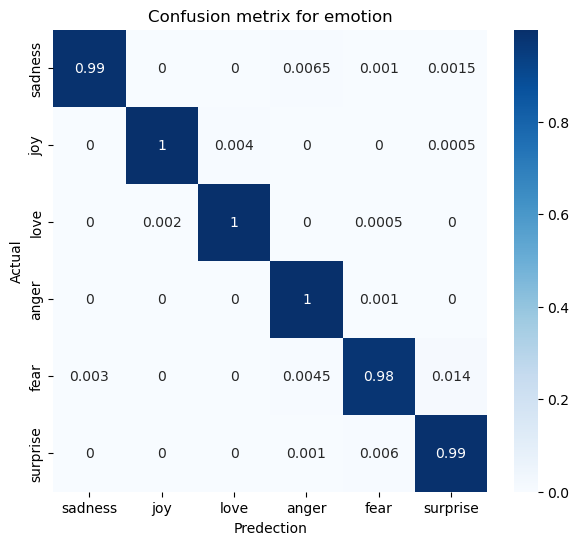

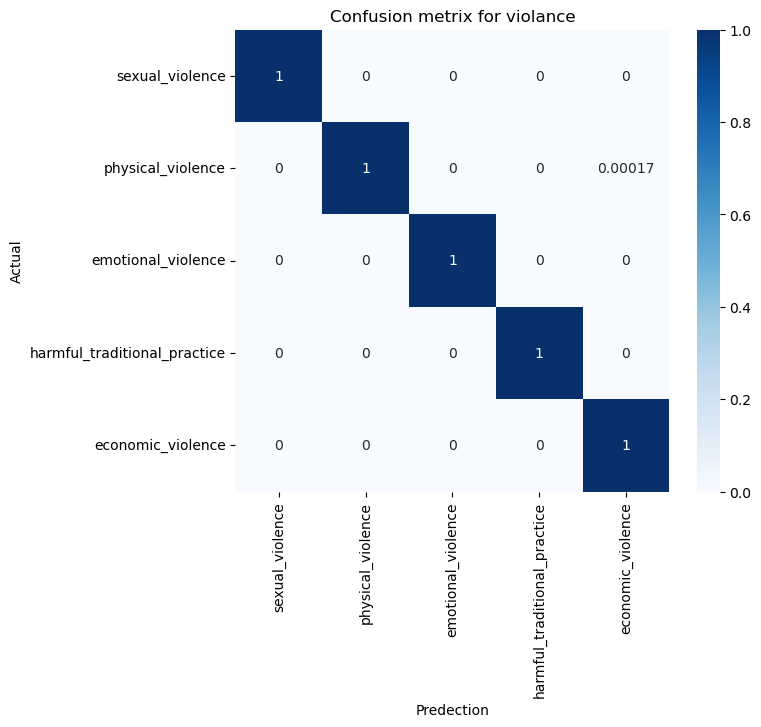

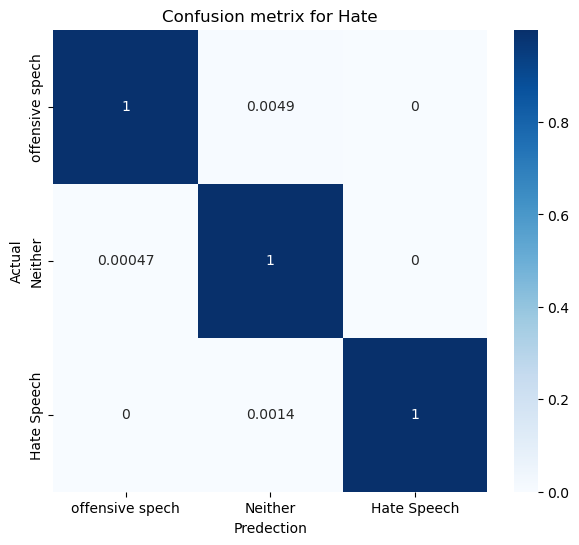

In [77]:
plot_cm(emotion_labels, emotion_pred, 'Confusion metrix for emotion', emotion_labels_text)
plot_cm(violance_labels, violance_pred, 'Confusion metrix for violance', violance_labels_text)
plot_cm(hate_labels, hate_pred, 'Confusion metrix for Hate', hate_labels_text)

manual testing 

In [91]:
def classify_text(input_text):

    # preprocess the input text
    input_text_cleaned = remove_stopwords(input_text)
    input_sequence = tokenizer.texts_to_sequences([input_text_cleaned])
    input_padded = pad_sequences(
        input_sequence,
        maxlen=max_length,
        padding='post'
    )

    # predection
    predections = model.predict({
        'emotion_input': input_padded,
        'violance_input': input_padded,
        'hate_input': input_padded
    })

    emotion_pred = np.argmax(predections[0], axis=1)[0]
    violance_pred = np.argmax(predections[1], axis=1)[0]
    hate_pred = np.argmax(predections[2], axis=1)[0]

    # determine major labels
    major_labels = ['Emotion', 'Violence', 'Hate']
    major_label_index = np.argmax(
        [np.max(predection[0])],
        np.argmax(
            [np.max(predection[1])],
            np.argmax([np.max(predection[2])])
        )
    )
    major_label = major_labels[major_label_index]

    # determine sub labels
    emotion_labels_text = [
        'sadness', 'joy', 'love', 'anger', 'fear', 'surprise'
    ]

    violance_labels_text = [
        'sexual_violence',
        'physical_violence',
        'emotional_violence',
        'harmful_traditional_practice',
        'economic_violence'
    ]

    hate_labels_text = [
        'offensive spech', 'Neither', 'Hate Speech'
    ]

    if major_label == 'Emotion':
        sub_label = emotion_labels_text[emotion_pred]

    elif major_label == 'Violence':
        sub_label = violence_labels_text[violence_pred]

    else:
        sub_label = hate_labels_text[hate_pred]

    return major_label, sub_label


In [92]:
import ipywidgets as widgets 
from IPython.display import display

In [93]:
#define a text widget and placeholder 
input_text_widget = widgets.Text(
    description = 'Input text :', 
    placeholder = 'Enter your text'
)

In [94]:
#define classify button 
button = widgets.Button(description = 'classify')

In [95]:
#define a output area to desplay result  
output = widgets.Output()

In [96]:
#function to handle event 
def on_button_click(b):
    with output: 
        output.clear_output() 
        input_text = input_text_widget.value
        major_label, sub_label = classify_text(input_text)
        print(f'Major Label :{major_label}')
        print(f'Sub Label: {sub_label}')

    #attach the button at the top 

    button.on_click(on_button_click)

In [97]:
display(input_text_widget, button, output)

Text(value='', description='Input text :', placeholder='Enter your text')

Button(description='classify', style=ButtonStyle())

Output()